#　1週目

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np
from scipy.integrate import simpson
from scipy.optimize import curve_fit
import os

## 課題１

In [2]:
#datファイルの読み込み
def extract_waveform_data(file_path):
    times = []
    voltages = []
    if not os.path.exists(file_path):
        print(f"エラー: ファイルが見つかりません: {file_path}")
        return np.array([]), np.array([])
    try:
        with open(file_path, 'r') as file:
            lines = file.readlines()
            data_lines = lines[6:]
            for line in data_lines:
                parts = line.strip().split()
                if len(parts) == 2:
                    try:
                        time_value = float(parts[0])
                        voltage_value = float(parts[1])
                        times.append(time_value)
                        voltages.append(voltage_value)
                    except ValueError:
                        pass       
    except Exception as e:
        print(f"ファイルの読み込み中にエラーが発生しました: {e}")
        return np.array([]), np.array([])
    
    return np.array(times), np.array(voltages)

In [3]:
#蛍光量を求める関数定義
def fluorescence_amount(voltage, time):
    r = 50 #抵抗
    g = 1e6
    current = (np.abs(voltage))/ r
    time = time + 4.9e-8
    q = simpson(current, time)
    amount = q / g
    return amount

In [4]:
file_path_1 = "DataSet/yoshioka01_Ch1.wfm.dat"
file_path_2 = "DataSet/yoshioka02_Ch1.wfm.dat"
file_path_3 = "DataSet/yoshioka03_Ch1.wfm.dat"
file_path_4 = "DataSet/yoshioka04_Ch1.wfm.dat"
file_path_5 = "DataSet/yoshioka05_Ch1.wfm.dat"

file_names = [file_path_1, file_path_2, file_path_3, file_path_4, file_path_5]
result = []
i = 1

for file in file_names:
   time, voltage = extract_waveform_data(file)
   f_amount = fluorescence_amount(voltage, time)
   result.append(f_amount)
   print(f"{i}番目のデータの蛍光量: {f_amount}")
   print("---------------------------\n")
   i = i + 1
mean = np.mean(result)
std = np.std(result)
print(f"平均値: {mean}, 標準偏差: {std}")

1番目のデータの蛍光量: 2.1338001847078488e-17
---------------------------

2番目のデータの蛍光量: 2.5768002839995127e-17
---------------------------

3番目のデータの蛍光量: 1.9456005280019682e-17
---------------------------

4番目のデータの蛍光量: 2.6524004312207585e-17
---------------------------

5番目のデータの蛍光量: 1.9387337536554866e-17
---------------------------

平均値: 2.249467036317115e-17, 標準偏差: 3.0717136069542422e-18


---

## 課題２

In [5]:
df = pd.read_csv("DataSet/day1_data2.csv")
df.head()

,upper_level(mV),lower_level(mV),time(s),count,K
0,-50,-130,2.44,50,20.492
1,-130,-210,80.76,50,0.619
2,-210,-290,146.45,50,0.341
3,-290,-370,111.96,15,0.134


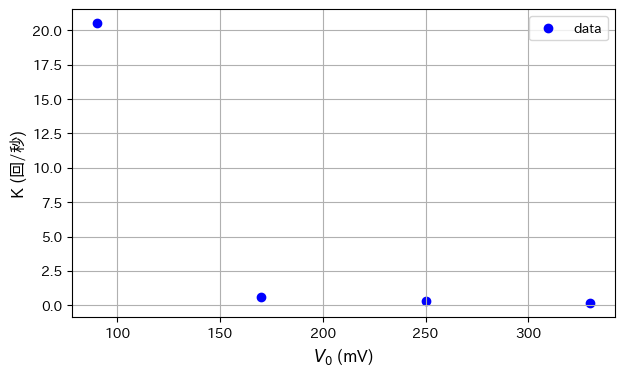

In [6]:
#曲線フィット
x = np.abs((df["upper_level(mV)"] + df["lower_level(mV)"]) / 2)
y = df["K"]

plt.figure(figsize=(7, 4))
plt.scatter(x, y, label='data', color='blue') 
plt.xlabel('$V_0$ (mV)', fontsize=12)
plt.ylabel('K (回/秒)', fontsize=12)
#plt.title('宇宙線のエネルギースペクトル', fontsize=14)
plt.legend()
plt.grid(True)
#plt.savefig("fig1-2-1.png")
plt.show()

近似式: y = 387176470.1817 x^-3.8005


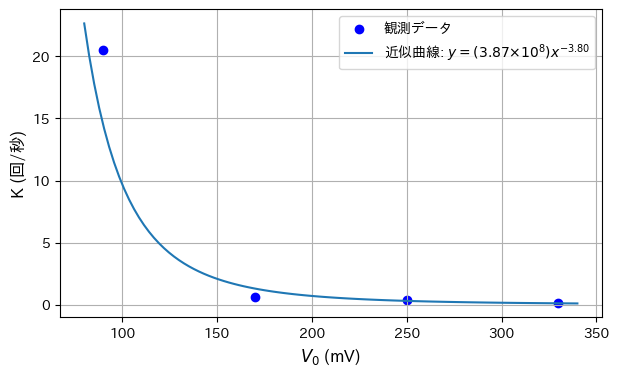

In [7]:
#累乗曲線近似
log_x = np.log(x)
log_y = np.log(y)

coeffes = np.polyfit(log_x, log_y, 1)
b = coeffes[0]
log_a = coeffes[1]
a = np.exp(log_a)

print(f"近似式: y = {a:.4f} x^{b:.4f}")

#表示
x_fit = np.linspace(min(x)-10, max(x)+10, 100)
y_fit = a * x_fit**b

plt.figure(figsize=(7, 4))
plt.scatter(x, y, label='観測データ', color='blue') 
plt.plot(x_fit, y_fit, label='近似曲線: $y = (3.87×10^8) x^{-3.80}$')
plt.xlabel('$V_0$ (mV)', fontsize=12)
plt.ylabel('K (回/秒)', fontsize=12)
#plt.title('宇宙線のエネルギースペクトル', fontsize=14)
plt.legend()
plt.grid(True)
plt.savefig("Pictures/fig1-2.png")
plt.show()

---

## 課題３

In [8]:
df = pd.read_csv("DataSet/time_dif.dat", sep=",", header=None)
t = df.iloc[:, 0]
df.head()

,0,1,2,3,4,5,6,7,8
0,3.273638e-10,4.234083e-10,-2.507932e-11,7.692949e-10,2.240215e-10,12.0,Delay(Ch1,Ch2),s
1,3.273638e-10,4.234083e-10,-2.507932e-11,7.692949e-10,2.240215e-10,12.0,Delay(Ch1,Ch2),s
2,5.974973e-10,4.367998e-10,-2.507932e-11,7.692949e-10,2.198518e-10,13.0,Delay(Ch1,Ch2),s
3,3.044582e-10,4.273468e-10,-2.507932e-11,7.692949e-10,2.141676e-10,14.0,Delay(Ch1,Ch2),s
4,4.211330e-10,4.269326e-10,-2.507932e-11,7.692949e-10,2.063833e-10,15.0,Delay(Ch1,Ch2),s


In [9]:
#θの計算
c = 2.998e10
arg = 2.5 / (c*t)
mask = (arg >= -1) & (arg <= 1)
arg_valid = arg[mask]
theta_deg = np.degrees(np.arcsin(arg_valid))
theta_deg = np.abs(theta_deg)
theta = np. where(theta_deg > 90, 180 - theta_deg, theta_deg)

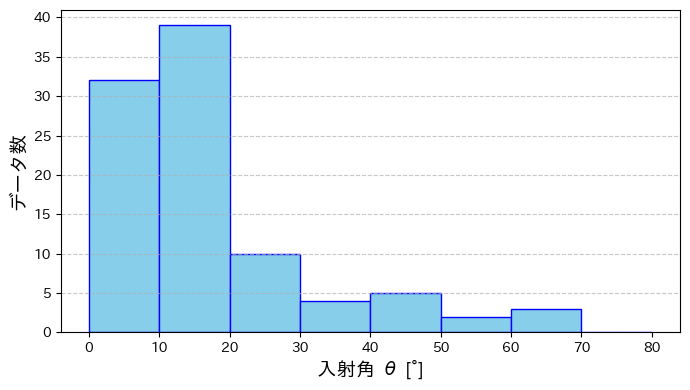

In [10]:
#ヒストグラムの作成
bins = np.arange(0, 90, 10)
plt.figure(figsize=(7, 4))
plt.hist(theta, bins=bins, edgecolor="blue", color="skyblue")
plt.xlabel("入射角 θ [°]", fontsize=14)
plt.ylabel("データ数", fontsize=14)
#plt.title("入射角のヒストグラム（0〜90°）", fontsize=16)
plt.xticks(bins)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig("Pictures/fig1-3.png")
plt.show()

In [11]:
#確認
print(theta)
print(f"有効データ数: {len(theta)}")

[14.75750285 14.75750285  8.02259881 15.89604499 11.42066485 62.05206164
  7.99144171  7.99144171 31.30959303 47.83610403  8.66037733  9.64831395
 11.32784899 11.32784899 13.67640165 13.67640165 50.97571463 50.97571463
 19.62732139 13.57781273 13.57781273 16.17082975  6.57604391 14.9494635
 19.33433624 65.64374537 14.29912474 14.29912474 17.45110414 37.03895926
  9.05897428 66.19091156 12.21105464 12.21105464  6.0743927  10.87590775
 12.26727074 22.75617209  7.66799631 13.38628043  7.96266536  9.02663294
  9.02663294 13.88513939  7.33034725  4.6964096  42.57362717 25.74155494
  6.52461138 13.8222929  10.44710908 10.44710908 19.93479681 26.58870009
 26.58870009 26.39956963 11.28894053 11.10527841  8.99659201  6.55295473
  6.55295473  4.66299455  6.61913929 10.26993117 10.26993117  8.34226604
 11.46608077 21.12961458  7.39069547  7.39069547  6.00881045  9.03273687
 32.80137246 49.173819    6.99539405  6.59305581  6.99489962  5.72601904
 14.92536068 10.34753531 21.91559999 11.34774452  5.